<a href="https://colab.research.google.com/github/A-Wadhwani/CS448-Project2/blob/master/CS448_Project_2_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("results.csv", index_col=None)
df.loc[df["Join Algorithm"] == "Index Join", "Join Algorithm"] = "Index"
df.loc[df["Join Algorithm"] == "Block Nested Loop Join", "Join Algorithm"] = "Block Nested"
df.loc[df["Join Algorithm"] == "Multi Buffer Product and Select", "Join Algorithm"] = "Cross Product"
df.head()

,Input Size,Join Algorithm,Runtime,Block Guess,Hits,Misses
0,100,Index,6,0,2,23
1,100,Block Nested,4,35,139,53
2,100,Cross Product,5,34,16,121
3,200,Index,10,3,2,23
4,200,Block Nested,7,68,271,86


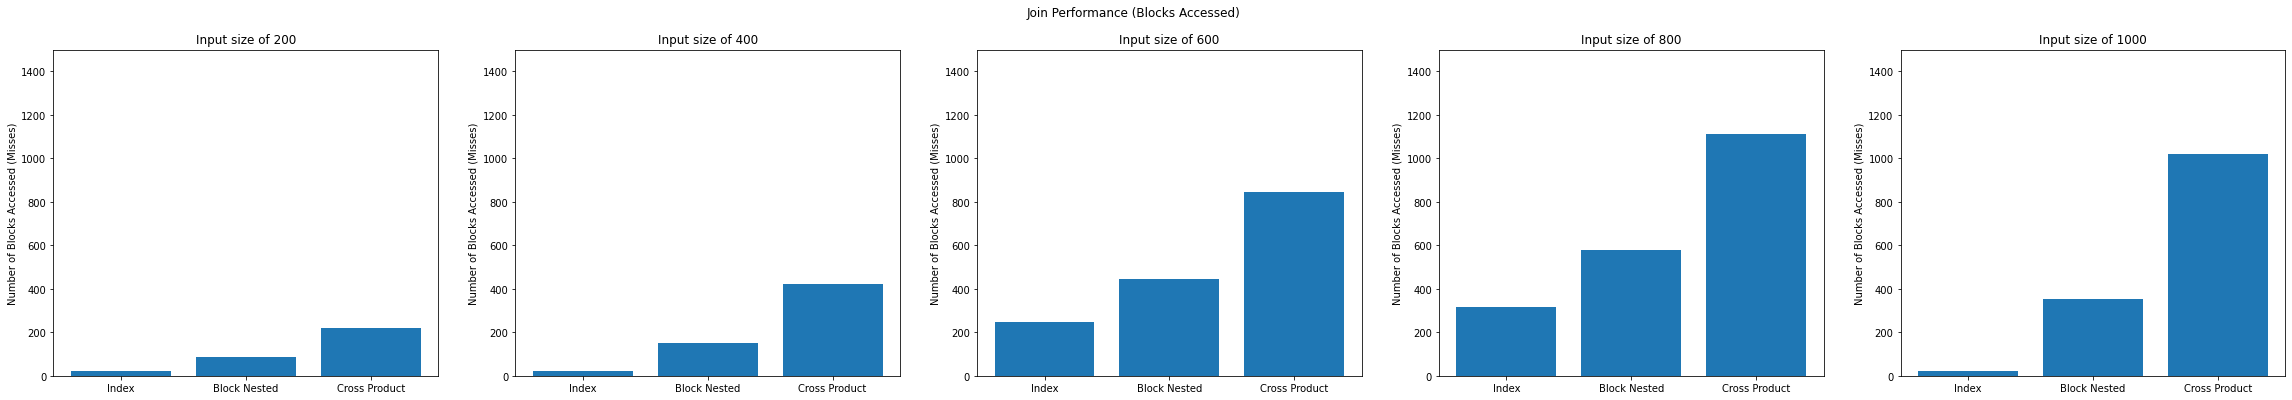

In [84]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
fig.suptitle("Join Performance (Blocks Accessed)")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"])
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 1500)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  val += 200

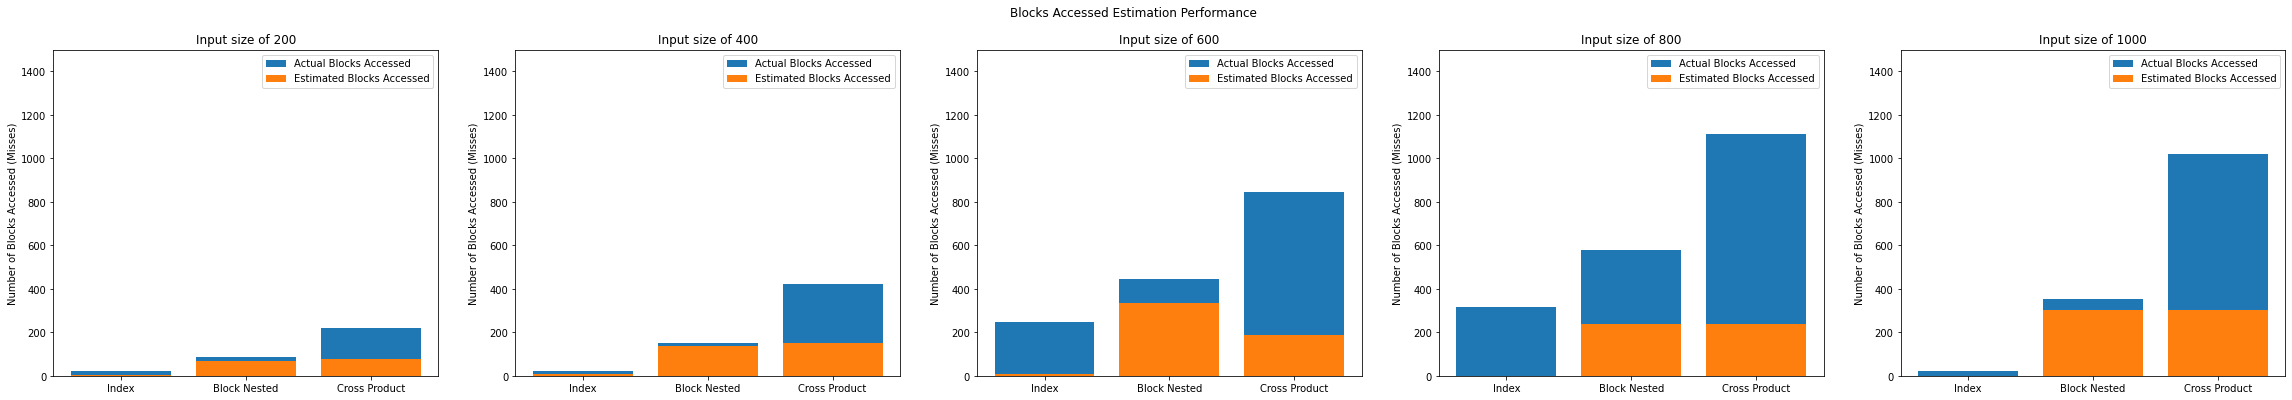

In [85]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
fig.suptitle("Blocks Accessed Estimation Performance")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"], label="Actual Blocks Accessed")
  ax.bar(n500["Join Algorithm"], n500["Block Guess"], label="Estimated Blocks Accessed")
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 1500)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  ax.legend()
  val += 200

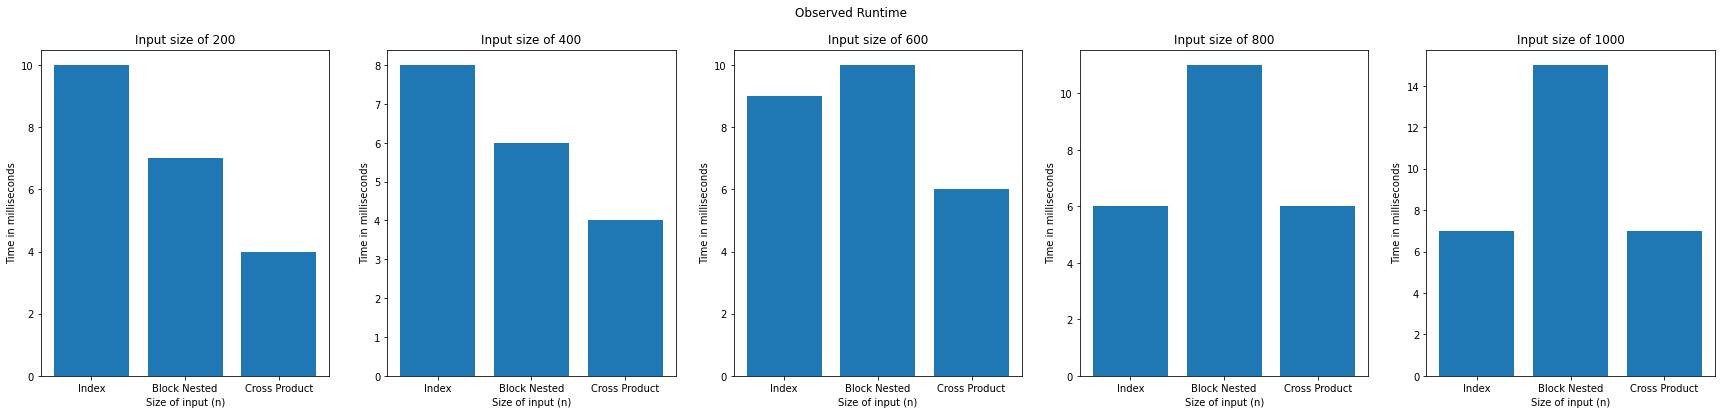

In [86]:
fig, axs = plt.subplots(1, 5, figsize=(30,6))
fig.suptitle("Observed Runtime")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Runtime"])
  ax.title.set_text("Input size of " + str(val))
  ax.set(xlabel="Size of input (n)", ylabel="Time in milliseconds")
  val += 200